___
# Atividade: Análise Exploratória - Variáveis Quantitativas
___

## Aula 03


<div id="indice"></div>

## Índice

- [Empresa de TV](#empresa-de-tv)
    

- [Análise Exploratória - Medidas resumo](#medidasresumo)
    - [Uso de tabelas de frequências para variáveis quantitativas](#tab-freq-quanti)
        - [Exercício 1](#ex1)
    - [Criando objetos que contenham `RENDA` separada por `PLANO`](#rendaporplano)
        - [Exercício 2](#ex2)
    - [Medidas resumo](#medidasresumo)
        - [Exercício 3](#ex3)
        - [Exercício 4](#ex4)
        - [Exercício 5](#ex5)
        - [Exercício 6](#ex6)
        - [Exercício 7](#ex7)
        - [Exercício 8](#ex8)
        - [Exercício 9](#ex9)


- [Análise Exploratória - Boxplot](#boxplot)
    - [Exercício 10](#ex10)
        

In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt


# Para ter melhor print
from IPython.display import display

In [2]:
# Listando o diretório de trabalho. Lembre-se que o arquivo com a base de dados precisa estar neste diretório.
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\rafag\OneDrive\Área de Trabalho\2_semestre\cdados\aulas\aula03


___
<div id="empresa-de-tv"></div>

# Empresa de TV

<img src="empresaTV.jpg" height="400">

Fonte: extraído da internet

Uma empresa de TV via satélite criou recentemente dois tipos de planos de canais (A e B).

A empresa tem como objetivo estudar o perfil dos clientes que aderiram ao plano para enviar malas diretas aos potenciais clientes de cada tipo de plano.

A base de dados apresenta algumas variáveis para uma amostra de 82 clientes selecionados aleatoriamente dentre aqueles que aderiram aos planos. As variáveis têm os seguintes significados:

* CLIENTE: identificador do cliente.
* PLANO: apresenta o plano adquirido pelo cliente – (1=A ou 2=B). 
* EC: apresenta estado civil do cliente no momento da adesão ao  plano – (1=Casado, 2=Solteiro e 3=Outros).
* SATISFACAO: grau de satisfação do cliente pelo plano – 
	(Muito insatisfeito, Insatisfeito, Indiferente, Satisfeito e Muito satisfeito).
* RENDA: renda pessoal do cliente, em milhares de reais.

O arquivo `EmpresaTV_Cod.xlsx` contém as variáveis descritas acima.

In [3]:
# Carregando os dados do arquivo
dados = pd.read_excel('EmpresaTV_Cod.xlsx')

In [4]:
dados['PLANO'] = dados['PLANO'].astype('category')
dados['EC'] = dados['EC'].astype('category')
dados['SATISFACAO'] = dados['SATISFACAO'].astype('category')

dados['PLANO'].cat.categories = ['A', 'B']
dados['EC'].cat.categories = ['Casado', 'Solteiro', 'Outros']
dados['SATISFACAO'] = pd.Categorical(dados.SATISFACAO, 
                                     categories = ['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 
                                                   'Satisfeito', 'Muito Satisfeito'], 
                                     ordered=True)

# Visualizando as cinco primeiras linhas
dados.head(5)

,CLIENTE,PLANO,EC,SATISFACAO,RENDA
0,1,A,Casado,Muito Satisfeito,21.4
1,2,A,Solteiro,Muito Satisfeito,17.2
2,3,A,Outros,Muito Satisfeito,15.6
3,4,A,Casado,Satisfeito,10.4
4,5,A,Solteiro,Muito Satisfeito,17.6


[Volta ao Índice](#indice)

___
<div id="medidasresumo"></div>

# Análise Exploratória - Medidas resumo

Na aula passada, aprendemos algumas ferramentas estatísticas que permitem explorar o comportamento de variáveis qualitativas.

Hoje, nosso objetivo será analisar, numérico e graficamente, as informações descritas em variáveis quantativas.

<div id="tab-freq-quanti"></div>

## Uso de tabelas de frequências para variáveis quantitativas

Vamos ver o que acontece ao tentarmos montar uma tabela de frequências com a variável `RENDA`.

<div id="ex1"></div>

### EXERCÍCIO 1

Faça uma tabela de frequências para a variável `RENDA` usando comando adequado visto na aula anterior.

O *output* fornecido permite explorar o comportamento da renda dos clientes que fizeram adesão de algum plano de TV?

In [5]:
# ESCREVA SEU CODIGO AQUI

dados["RENDA"].value_counts(normalize=True)*100

5.3     3.658537
4.9     3.658537
4.7     2.439024
13.2    2.439024
2.5     2.439024
          ...   
11.5    1.219512
10.8    1.219512
8.9     1.219512
0.7     1.219512
0.6     1.219512
Name: RENDA, Length: 65, dtype: float64

[Volta ao Índice](#indice)

<div id="rendaporplano"></div>


## Criando objetos que contenham `RENDA` separada por `PLANO`

Ainda não consideramos a variável RENDA em nossa análise. 
Vamos explora-la para melhor compreender o perfil dos clientes dessa empresa.

Como o objetivo da empresa é entender o perfil dos clientes em cada plano, então vamos antes criar dois novos *dataframes* e duas novas *Series* conforme exercício a seguir. 

<div id="ex2"></div>

### EXERCÍCIO 2

Crie quatro objetos:

- `dados_a` contendo somente os dados dos clientes do plano A;
- `dados_b` contendo somente os dados dos clientes do plano B;
- `renda_a` contendo somente a renda dos clientes do plano A;
- `renda_b` contendo somente a renda dos clientes do plano B.

**Dica:** Use conhecimentos adquiridos nas aulas anteriores.

In [13]:
# ESCREVA SEU CODIGO AQUI

dados_a = dados.loc[dados["PLANO"] == "A", :]
dados_b = dados.loc[dados["PLANO"] == "B", :]

renda_a = dados_a.loc[:, "RENDA"] # também poderia ser renda_a = dados.loc[dados["PLANO"] == "A", "RENDA"]
renda_b = dados_b.loc[:, "RENDA"] # também poderia ser renda_b = dados.loc[dados["PLANO"] == "B", "RENDA"]

[Volta ao Índice](#indice)

<div id="medidasresumo"></div>

## Medidas resumo

O pandas disponibiliza diversas funções para o cálculo de medidas resumo. Alguns exemplos são: `mean`, `median`, `quantile`, `var`, `std`. Os nomes das funções dão uma boa dica do que elas fazem, mas, como sempre, é bom verificar a documentação do pandas para garantir que elas fazem o que você espera.


<div id="ex3"></div>

### EXERCÍCIO 3

Imprima a média, o primeiro quartil ($Q1$), segundo quartil ou mediana ($Q2$), terceiro quartil ($Q3$) e o desvio padrão das rendas do clientes do plano A e B, separadamente. 

Interprete os resultados numéricos em termos do problema.

In [45]:
# ESCREVA SEU CODIGO AQUI

for plano, renda in (("PLANO A", renda_a), ("PLANO B", renda_b)):
    
    print(plano)
    print(f'n: {len(renda)}')
    print(f'Média: {renda.mean():.3f}')
    print(f'Mínimo: {renda.min():.3f}')
    print(f'Quartil 1: {renda.quantile(q=0.25):.3f}')
    print(f'Mediana (quartil 2): {renda.median():.3f}')
    print(f'Quartil 3: {renda.quantile(q=0.75):.3f}')
    print(f'Desvio padrão: {renda.std():.3f}')
    print(f'Variância: {renda.var():.3f}')
    print(f'Máximo: {renda.max():.3f}')
    print("\n")


# # para clientes do plano A:
# print(f'Renda média do Plano A: {renda_a.mean():.3f}')
# print(f'Quartil 1 do Plano A: {renda_a.quantile(q=0.25):.3f}')
# print(f'Mediana do Plano A: {renda_a.median():.3f}')
# print(f'Quartil 3 do Plano A: {renda_a.quantile(q=0.75):.3f}')
# print(f'Desvio padrão do Plano A: {renda_a.std():.3f}')

# # para clientes do plano B:
# print(f'Renda média do Plano B: {renda_b.mean():.3f}')
# print(f'Quartil 1 do Plano B: {renda_b.quantile(q=0.25):.3f}')
# print(f'Mediana do Plano B: {renda_b.median():.3f}')
# print(f'Quartil 3 do Plano B: {renda_b.quantile(q=0.75):.3f}')
# print(f'Desvio padrão do Plano B: {renda_b.std():.3f}')

PLANO A
n: 46
Média: 10.422
Mínimo: 0.700
Quartil 1: 7.475
Mediana (quartil 2): 10.350
Quartil 3: 13.200
Desvio padrão: 4.466
Variância: 19.941
Máximo: 21.400


PLANO B
n: 36
Média: 5.689
Mínimo: 0.600
Quartil 1: 4.150
Mediana (quartil 2): 5.150
Quartil 3: 6.375
Desvio padrão: 3.293
Variância: 10.847
Máximo: 19.200




[Volta ao Índice](#indice)

<div id="ex4"></div>

### EXERCÍCIO 4

<div id="describe"></div>

Uma função bastante útil em uma análise exploratória de variável quantitativa é a `.describe()`. 

Utilize essa função `.describe()` com as rendas dos planos A e B e compare os resultados numéricos com os obtidos na célula anterior.

In [51]:
# ESCREVA SEU CODIGO AQUI

print("PLANO A:")
renda_a.describe().to_frame()

PLANO A:


,RENDA
count,46.000000
mean,10.421739
std,4.465568
min,0.700000
25%,7.475000
50%,10.350000
75%,13.200000
max,21.400000


In [52]:
print("PLANO B:")
renda_b.describe().to_frame()

PLANO B:


,RENDA
count,36.000000
mean,5.688889
std,3.293437
min,0.600000
25%,4.150000
50%,5.150000
75%,6.375000
max,19.200000


[Volta ao Índice](#indice)

<div id="ex5"></div>

### EXERCÍCIO 5

Quais hipóteses você pode formular a partir das medidas resumo da renda dos clientes dos dois planos?

In [ ]:
#ESCREVA SUA RESPOSTA AQUI

# As pessoas do plano A têm, em média, uma renda média maior (quase o dobro); as 25% que menos ganham do plano A ganham até 
# 7475 reais,enquanto as 75% que ganham menos do plano B ganham até 6375 reais

[Volta ao Índice](#indice)

<div id="ex6"></div>

### EXERCÍCIO 6

Estude a função `.groupby(by= )` e utilize-a para imprimir as medidas resumo da variável quantitativa `RENDA` para cada categoria da variável `PLANO`, separadamente.


**DICAS**: Você deve usar essa função no *dataframe* completo `dados` e pode pedir as medidas resumo a partir da função `.describe()`.

In [57]:
#ESCREVA SUA RESPOSTA AQUI

dados.groupby(by="PLANO").RENDA.describe()

,count,mean,std,min,25%,50%,75%,max
PLANO,,,,,,,,
A,46.0,10.421739,4.465568,0.7,7.475,10.35,13.200,21.4
B,36.0,5.688889,3.293437,0.6,4.150,5.15,6.375,19.2


[Volta ao Índice](#indice)

<div id="ex7"></div>

### EXERCÍCIO 7 
No [Exercício 1](#exe1), vimos que não faz sentido construir uma tabela de frequências na variável `RENDA` devido ao seu tipo de variável ser contínua. 

Crie uma nova coluna em `dados` chamada `FAIXA_DE_RENDA`que contenha a classificação da renda de cada cliente. Para tanto, use 3 faixas de renda, todas com amplitudes iguais. Note que essa quantidade de faixas não necessariamente é uma boa ideia, mas vamos começar com essa análise simplificada.


**DICA**: a função `pd.cut` pode ser útil para resolver este exercício.

In [101]:
#ESCREVA SUA RESPOSTA AQUI

dados["FAIXA_DE_RENDA"] = pd.cut(dados.RENDA, 3)
dados

,CLIENTE,PLANO,EC,SATISFACAO,RENDA,FAIXA_DE_RENDA
0,1,A,Casado,Muito Satisfeito,21.4,"(14.467, 21.4]"
1,2,A,Solteiro,Muito Satisfeito,17.2,"(14.467, 21.4]"
2,3,A,Outros,Muito Satisfeito,15.6,"(14.467, 21.4]"
3,4,A,Casado,Satisfeito,10.4,"(7.533, 14.467]"
4,5,A,Solteiro,Muito Satisfeito,17.6,"(14.467, 21.4]"
...,...,...,...,...,...,...
77,78,B,Outros,Insatisfeito,4.3,"(0.579, 7.533]"
78,79,B,Solteiro,Insatisfeito,5.7,"(0.579, 7.533]"
79,80,B,Casado,Insatisfeito,4.0,"(0.579, 7.533]"
80,81,B,Outros,Insatisfeito,5.4,"(0.579, 7.533]"


[Volta ao Índice](#indice)

<div id="ex8"></div>

### EXERCÍCIO 8

Monte uma tabela cruzada de sentimento versus plano e faixa de renda.

In [105]:
#ESCREVA SUA RESPOSTA AQUI

sentimento = []
for linha in dados["SATISFACAO"]:
    if linha == "Satisfeito" or linha == "Muito Satisfeito":
        sentimento.append("Curtiu")
    elif linha == "Indiferente":
        sentimento.append("Indiferente")
    elif linha == "Insatisfeito" or linha == "Muito Insatisfeito":
        sentimento.append("Não curtiu")

dados["SENTIMENTO"] = sentimento   
dados["SENTIMENTO"] = dados["SENTIMENTO"].astype("category")
dados["SENTIMENTO"] = pd.Categorical(dados.SENTIMENTO, categories=["Não curtiu", "Indiferente", "Curtiu"], ordered=True)

pd.crosstab(dados.SENTIMENTO, [dados.PLANO, dados.FAIXA_DE_RENDA])

PLANO                       A                                             B  \
FAIXA_DE_RENDA (0.579, 7.533] (7.533, 14.467] (14.467, 21.4] (0.579, 7.533]   
SENTIMENTO                                                                    
Não curtiu                  7               0              0             17   
Indiferente                 4               3              0             11   
Curtiu                      1              24              7              0   

PLANO                                          
FAIXA_DE_RENDA (7.533, 14.467] (14.467, 21.4]  
SENTIMENTO                                     
Não curtiu                   0              0  
Indiferente                  1              0  
Curtiu                       6              1

[Volta ao Índice](#indice)

<div id="ex9"></div>

### EXERCÍCIO 9

Por que não faria sentido montar uma tabela cruzada utilizando a variável RENDA no lugar de FAIXA_DE_RENDA?

[Volta ao Índice](#indice)

<div id="boxplot"></div>

# Análise Exploratória - Boxplot

O boxplot usa os quartis, os quais segmentam os dados em quatro partes iguais em termos de concentração, ou seja, deixa 25% do tamanho da amostra entre os quartis.

Esse gráfico é uma ferramenta estatística muito importante para extrair informações de **variáveis quantitativas**, além de permitir, com facilidade, cruzar variável quantitativa segmentada por rótulos (níveis) de outra variável qualitativa. 

Outra vantagem desse gráfico é que o mesmo permite identificar possíveis valores aberrantes caso haja observação com valor fora dos limites inferior ($LI$) e superior ($LS$), os quais são calculados a partir dos quartis $Q1$ e $Q3$ da seguinte forma:

 * $LI = Q1 - 1,5 * (Q3 - Q1)$
 * $LS = Q3 + 1,5 * (Q3 - Q1)$

<br>

**Valores que são considerados na construção do boxplot:**

  * A **caixa do boxplot** é formada pelos quartis $Q1$ e $Q3$ e dentro é colocada uma linha de acordo com o valor obtido para a mediana ($Q2$).
  * A **haste inferior** representa o menor valor numérico contido no conjunto de dados desde que esse seja maior que o limite inferior ($LI$). Caso haja valores no conjunto de dados menores do que o $LI$, esses devem ser identificados como *outliers* no gráfico.
  * A **haste superior** representa o maior valor numérico contido no conjunto de dados desde que esse seja menor que o limite superior ($LS$). Caso haja valores no conjunto de dados maiores do que o $LS$, esses devem ser identificados como *outliers* no gráfico.


Para consultar uso de cores na edição de um boxplot, consulte [link1](https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/) e [link2](https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color), por exemplo.

<br>

A seguir, apresentamos o comando para gerar o boxplot a partir do *matplotlib*. Aproveite para entender o uso do comando `plt.subplot(linhas,colunas,posição)` útil para visualização da análise exploratória dos dados

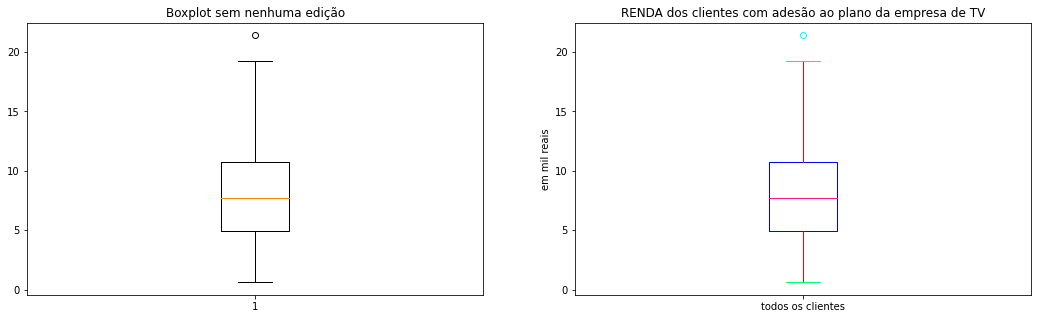

In [62]:
plt.figure(figsize=(18,5))

plt.subplot(1,2,1)
plt.boxplot(dados.RENDA)
plt.title('Boxplot sem nenhuma edição')

plt.subplot(1,2,2)
plt.boxplot(dados.RENDA, labels = ['todos os clientes'],  
            boxprops=dict(color='blue'),
            medianprops=dict(color='deeppink'),
            capprops=dict(color='springgreen'),
            whiskerprops=dict(color='red'),
            flierprops=dict(color='yellow', markeredgecolor='cyan')
            )
plt.title('RENDA dos clientes com adesão ao plano da empresa de TV')
plt.ylabel('em mil reais')

plt.show()

[Volta ao Índice](#indice)

<div id="ex10"></div>

### EXERCÍCIO 10

Estude o comportamento da variável quantitativa `RENDA` segmentado por `PLANO` utilizando a ferramenta gráfica Boxplot.

Faça de duas formas diferentes:
  1. Construção dos boxplots da renda para cada plano em gráficos separados. Aqui, podem usar o comando `plt.subplot()` para organizar o *output*.
  1. Construção de um único gráfico (apenas um eixo y) contendo os dois boxplots da renda para cada plano.
  1. Discuta prols e contras de cada caso.

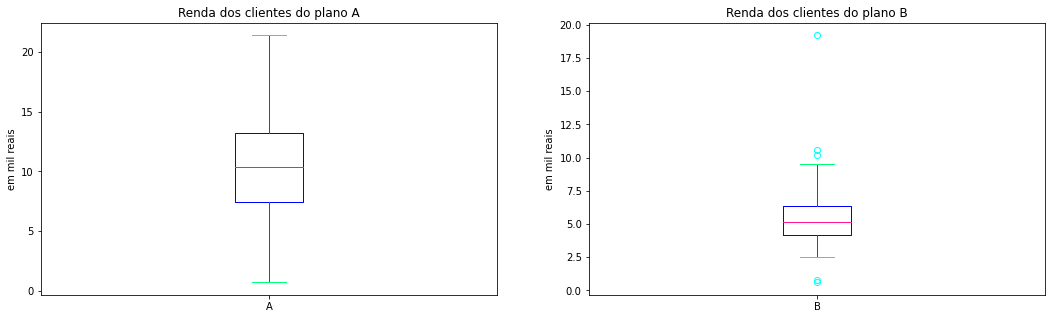

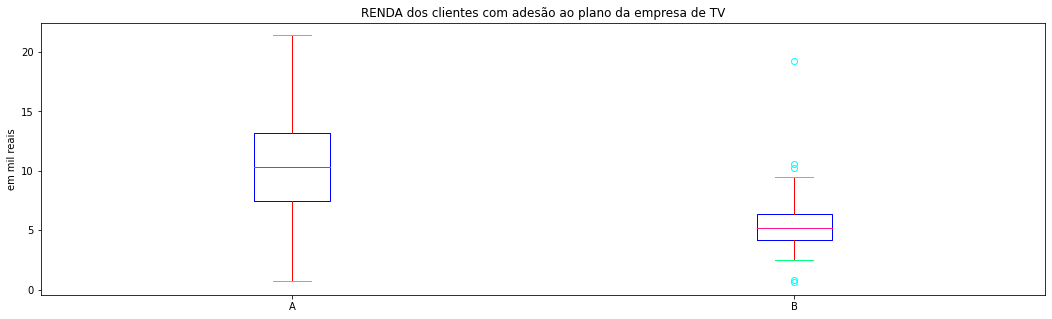

In [84]:
#ESCREVA SEU CODIGO AQUI

plt.figure(figsize=(18,5))

plt.subplot(121)
plt.boxplot(renda_a, labels=["A"],
           boxprops=dict(color='blue'),
             medianprops=dict(color='deeppink'),
             capprops=dict(color='springgreen'),
             whiskerprops=dict(color='red'),
             flierprops=dict(color='yellow', markeredgecolor='cyan')
             )
plt.title("Renda dos clientes do plano A")
plt.ylabel("em mil reais")

plt.subplot(122)
plt.boxplot(renda_b, labels=["B"],
           boxprops=dict(color='blue'),
             medianprops=dict(color='deeppink'),
             capprops=dict(color='springgreen'),
             whiskerprops=dict(color='red'),
             flierprops=dict(color='yellow', markeredgecolor='cyan')
             )
plt.title("Renda dos clientes do plano B")
plt.ylabel("em mil reais")

plt.figure(figsize=(18,5))
plt.boxplot([renda_a, renda_b], labels = ["A", "B"],  
            boxprops=dict(color='blue'),
            medianprops=dict(color='deeppink'),
            capprops=dict(color='springgreen'),
            whiskerprops=dict(color='red'),
            flierprops=dict(color='yellow', markeredgecolor='cyan')
            )
plt.title('RENDA dos clientes com adesão ao plano da empresa de TV')
plt.ylabel('em mil reais')

plt.show()

[Volta ao Índice](#indice)